# Program - 

**Purpose**


**Content**
- read data
- plot XY profiles

**Author:** Yi-Hsuan Chen (yihsuan@umich.edu)

**Date:** 

**Reference program:**



In [43]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Read data

### TaiESM1 data

In [45]:
#--- datapath
datapath_TaiESM1 = "/Users/yi-hsuanchen/Downloads/yihsuan/research/data/TaiESM1/data/CMIP6/TaiESM1/amip-hist/atmos/mon/r1i1p1f1/"
fnames_rsut = [
    "rsut_Amon_TaiESM1_amip-hist_r1i1p1f1_gn_197901-201012.nc",
    "rsut_Amon_TaiESM1_amip-hist_r1i1p1f1_gn_201101-201412.nc",
]
fnames_rsut = [datapath_TaiESM1+"/"+file1 for file1 in fnames_rsut]

da_rsut = xr.open_mfdataset(fnames_rsut)


### CERES data

In [46]:
datapath_ceres = "/Users/yi-hsuanchen/Downloads/yihsuan/research/data/CERES/"
fname_ceres = datapath_ceres + "/" + "CERES_EBAF-TOA_Ed4.2_Subset_200101-201412.nc"

da_ceres = xr.open_dataset(fname_ceres)

## Plot - TaiESM1 data

In [47]:
#da_rsut.lon

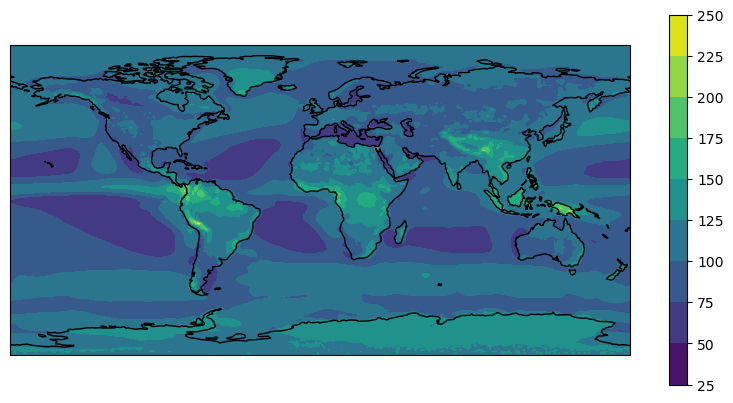

In [48]:
#--- determine map projection
map_projection = ccrs.PlateCarree()

#--- add a cyclic point in lon, otherwise, there will be a white line at the edge
data, lon_cyclic = cutil.add_cyclic_point(da_rsut.rsut.mean("time"), coord=da_rsut.lon)  

#--- plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=map_projection)

cn_map_rsut = ax.contourf(lon_cyclic, da_rsut.lat, data, transform=map_projection)

#--- add coast lines
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS)
#ax.set_global()

#--- plot a colorbar
cbar = plt.colorbar(cn_map_rsut, ax=ax, orientation='vertical', shrink=0.8)


## Plot - CERES data

In [39]:
da_ceres

<xarray.Dataset>
Dimensions:                     (lon: 360, lat: 180, time: 168)
Coordinates:
  * lon                         (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                         (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                        (time) datetime64[ns] 2001-01-15 ... 2014-12-15
Data variables:
    toa_sw_all_mon              (time, lat, lon) float32 ...
    toa_lw_all_mon              (time, lat, lon) float32 ...
    toa_net_all_mon             (time, lat, lon) float32 ...
    toa_sw_clr_c_mon            (time, lat, lon) float32 ...
    toa_lw_clr_c_mon            (time, lat, lon) float32 ...
    toa_net_clr_c_mon           (time, lat, lon) float32 ...
    solar_mon                   (time, lat, lon) float32 ...
    cldarea_total_daynight_mon  (time, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.2; Release Date December 9, 2022
    DOI:          10.5067/TERRA-AQUA-NOAA20/CERES/EBAF-TOA_L3B004.2

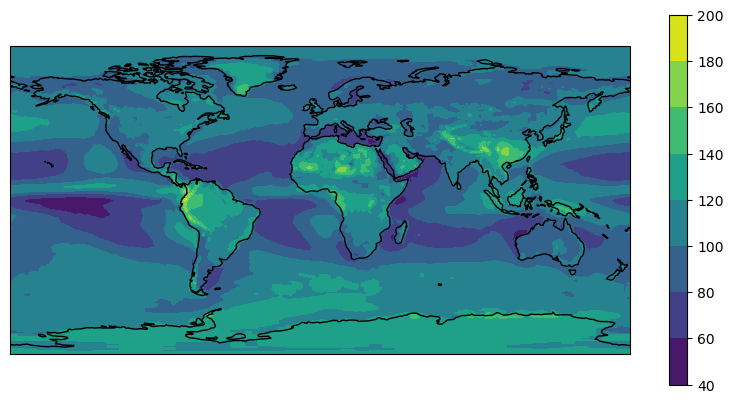

In [49]:
#--- add a cyclic point in lon, otherwise, there will be a white line at the edge
data, lon_cyclic = cutil.add_cyclic_point(da_ceres.toa_sw_all_mon.mean("time"), coord=da_ceres.lon)  

#--- plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=map_projection)

cn_map_rsut = ax.contourf(lon_cyclic, da_ceres.lat, data, transform=map_projection)

#--- add coast lines
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS)
#ax.set_global()

#--- plot a colorbar
cbar = plt.colorbar(cn_map_rsut, ax=ax, orientation='vertical', shrink=0.8)

In [ ]:
#yhc.lib("fdef")   # check out yhc library